In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#1 / np.power(10000, (2 * (11//2)) / np.float32(16))  

In [3]:
#np.newaxis

In [4]:
#np.arange(10)

In [5]:

# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  #angle_rates = (1) / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  #print(pos * angle_rates)
  angle_rates = np.linspace(2*math.pi,0,d_model) #
  #print(pos)
  #return angle_rates
  #print(pos * angle_rates)
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
  #print("second", angle_rads) 
  pos_encoding = angle_rads[np.newaxis, ...]
  #print(angle_rads)  
  return pos_encoding



(1, 50, 16)


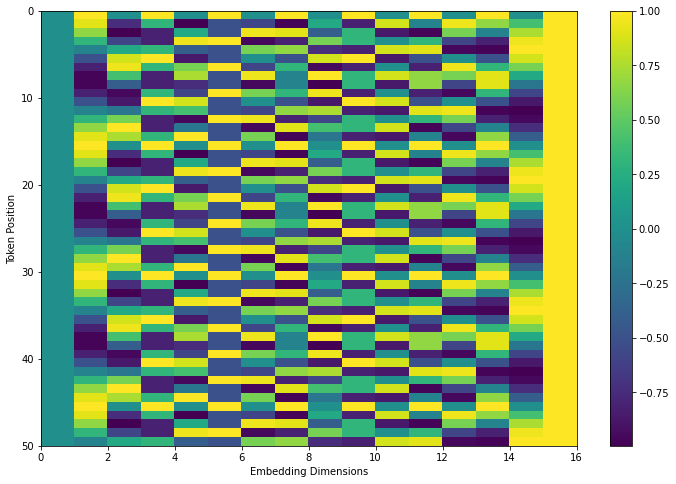

In [6]:
tokens = 50
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [7]:
pos_encoding.shape

(1, 50, 16)

In [8]:
#np.sin(2*math.pi)

In [9]:
#np.sin(360)

In [10]:
## Problem 2
'''
If B is a set of basis vectors, are the vectors Orthonormal? Orthogonal? If not,
make the basis vectors orthogonal and orthonormal using G-S method.
'''
# Not necessarily

'\nIf B is a set of basis vectors, are the vectors Orthonormal? Orthogonal? If not,\nmake the basis vectors orthogonal and orthonormal using G-S method.\n'

In [11]:
from scipy.linalg import orth
#A = np.array([[2, 0, 0], [0, 5, 0]])  # rank 2 array
matrix = [
          [1, 0, 0],
          [1, 1, 0],
          [1, 1, 1],
]
matrix = [
          [1, 1, 1],
          [0, 1, 1],
          [0, 0, 1],
]

A = np.array(matrix)
orth(A)

array([[ 0.73697623,  0.59100905,  0.32798528],
       [ 0.59100905, -0.32798528, -0.73697623],
       [ 0.32798528, -0.73697623,  0.59100905]])

In [12]:
A

array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])

In [13]:
A.T

array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [14]:
np.square(np.linalg.norm([1, 1, 1]) )

2.9999999999999996

In [15]:
for i, vector in enumerate(A):
  print(i, vector)

0 [1 1 1]
1 [0 1 1]
2 [0 0 1]


In [16]:
def gram_test(vectors):
    
    basis = []
    for i, vector in enumerate(vectors):
      sub = 0
      if i == 0:
        basis.append(vector)
        
      else:
        #temp = vector - np.sum(( np.dot(vector, b) / np.square(np.linalg.norm(b)) ) * b for b in basis )
        for b in basis:
          sub += ( (np.dot(vector, b)  ) / np.square(np.linalg.norm(b)) )* b
        temp = vector - sub
        basis.append(temp)
        #print(temp)
        #basis.append(temp)
    
    #print(np.array(basis) )
    return (np.array(basis))
  #this gives orthogonal, but need to normalize first
    

In [17]:
gram_test(A)

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [-6.66666667e-01,  3.33333333e-01,  3.33333333e-01],
       [-5.55111512e-17, -5.00000000e-01,  5.00000000e-01]])

In [18]:
mat = [
          [1, 0, -1],
          [1, math.sqrt(2), 1],
          [1, -math.sqrt(2), 1],
       
]

swag = np.array(mat)
swag

array([[ 1.        ,  0.        , -1.        ],
       [ 1.        ,  1.41421356,  1.        ],
       [ 1.        , -1.41421356,  1.        ]])

In [19]:
gram_test(swag)

array([[ 1.        ,  0.        , -1.        ],
       [ 1.        ,  1.41421356,  1.        ],
       [ 1.        , -1.41421356,  1.        ]])

In [20]:
def gram_normal(vectors):
  answer = []
  for v in vectors:
    answer.append(v / np.linalg.norm(v))
  return np.array(answer)

In [21]:
gram_normal(gram_test(A))

array([[ 5.77350269e-01,  5.77350269e-01,  5.77350269e-01],
       [-8.16496581e-01,  4.08248290e-01,  4.08248290e-01],
       [-7.85046229e-17, -7.07106781e-01,  7.07106781e-01]])

In [22]:
gram_normal(gram_test(swag))

array([[ 0.70710678,  0.        , -0.70710678],
       [ 0.5       ,  0.70710678,  0.5       ],
       [ 0.5       , -0.70710678,  0.5       ]])

In [23]:
len(A)

3

In [24]:
A

array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])

In [25]:
#our vectors are horizontal
def gram_process(vectors):
  return gram_normal(gram_test(vectors))

In [26]:
gram_process(A)

array([[ 5.77350269e-01,  5.77350269e-01,  5.77350269e-01],
       [-8.16496581e-01,  4.08248290e-01,  4.08248290e-01],
       [-7.85046229e-17, -7.07106781e-01,  7.07106781e-01]])

In [27]:
gram_process(swag)[0]

array([ 0.70710678,  0.        , -0.70710678])

In [28]:
gram_process(swag)[1]

array([0.5       , 0.70710678, 0.5       ])

In [29]:
gram_process(swag)[2]

array([ 0.5       , -0.70710678,  0.5       ])

In [30]:
gram_process(swag)

array([[ 0.70710678,  0.        , -0.70710678],
       [ 0.5       ,  0.70710678,  0.5       ],
       [ 0.5       , -0.70710678,  0.5       ]])

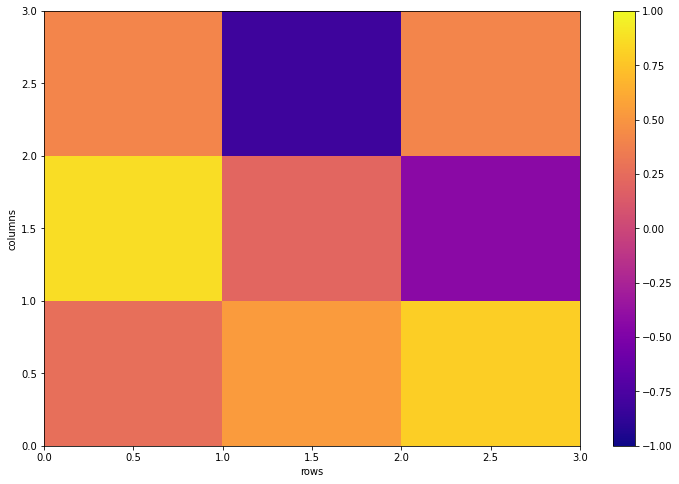

In [31]:
#tokens = 50
parameters = 5
# Uncomment next line and comment out the other 'example' below if you want to use a random n x n matrix
# example = np.random.rand(parameters, parameters)

example = np.array([
           [1, 2, 3],
           [3, 2, 1],
           [0, 0, 1]
           
])
answer = gram_process(example)

plt.figure(figsize=(12,8))
plt.pcolormesh(answer, cmap='plasma')
plt.xlabel('rows')
#plt.xlim((0, dimensions))
#plt.ylim((tokens,0))
plt.ylabel('columns')
plt.clim(-1, 1)
plt.colorbar()
plt.show()


In [32]:
answer

array([[ 0.26726124,  0.53452248,  0.80178373],
       [ 0.87287156,  0.21821789, -0.43643578],
       [ 0.40824829, -0.81649658,  0.40824829]])